## **Case Study Solution**

### **Background**
XYZ Finance is a leading NBFC in India that specializes in **vehicle financing**. The company has a large customer base for its vehicle loans. It also offers various other products like:
- **Insurance**
- **Personal Loans**
- **Asset Management Services**

---

### **Problem Statement**
- The company's current cross-sell rate is **12%**, which is lower than the industry average.
- The company aims to increase the cross-sell rate to **25%** to:
  - Boost **revenue**.
  - Improve **customer loyalty**.

---

#### **Created By**  
**Partha Chowdhury**  
[LinkedIn Profile](www.linkedin.com/in/parthach)


#### ----------------------------------

# **Summary of Steps Performed**

---

## **1. Data Understanding and Cleaning**
- **Explored the dataset** to understand the available features and target variable (`cross_sell_flag`).
- **Data Cleaning**:
  - Removed or transformed non-numeric and irrelevant columns.
  - Handled missing values through imputation or removal.
  - Ensured correct data types for all features.
- **Synthetic Feature Engineering**:
  - Generated new features such as `interaction_intensity` and behavioral flags using the **Faker library** and custom logic.
  - Applied transformations to skewed features (e.g., `log1p` for `ltv` and `disbursed_amount`).

---

## **2. Exploratory Data Analysis (EDA)**
- Visualized **distributions of key features** (e.g., age, loan amount, email click rate).
- Investigated **patterns in cross-sell success**:
  - Correlations between features (e.g., `ltv` vs. `asset_cost`).
  - Cross-sell rates by demographic segments (e.g., age, employment type).
- Highlighted **important behavioral metrics**:
  - Higher engagement through email and calls correlates with higher cross-sell rates.

---

## **3. Feature Engineering**
- Created meaningful derived features:
  - **Loan-to-value ratio** for financial capacity.
  - **Income proxies** using `disbursed_amount` and synthetic data.
  - **Interaction metrics**: email clicks, SMS counts, and call log counts.
- Performed **feature scaling and transformation**:
  - Transformed skewed numerical features.
  - Binned features like `PERFORM_CNS_SCORE` into equal-width bins.

---

## **4. Model Development**
- Built and evaluated three machine learning models:
  1. **Logistic Regression** (with SMOTE for class imbalance handling).
  2. **Random Forest** (with `class_weight='balanced'` for imbalance handling).
  3. **XGBoost** (with `scale_pos_weight` to manage class imbalance).
- **Model Comparison**:
  - Evaluated models using metrics:
    - **Accuracy**
    - **Balanced Accuracy**
    - **AUC-ROC**

---

## **5. Feature Importance Analysis**
- Calculated **feature importance scores** for Random Forest and XGBoost.
- Identified the **top 10 predictive features**:
  - `age`, `asset_cost`, `ltv`, `disbursed_amount`, etc.
- Used these features to test if models perform better with a reduced feature set.

---

## **6. Insights and Recommendations**
- Identified key predictors for cross-sell success:
  - Customer demographics (e.g., `age`).
  - Engagement metrics (e.g., `email_click_rate`, `call_logs_count`).
  - Financial stability indicators (e.g., `ltv`, `CREDIT_HISTORY_LENGTH_MONTHS`).
- Suggested actionable strategies:
  - Personalized marketing for high-engagement customers.
  - Bundled offerings for customers with higher loan-to-value ratios.
  - Regional targeting based on branch-level performance.

---

## **7. Model Saving and Deployment**
- Saved the trained models (**Logistic Regression**, **Random Forest**, **XGBoost**) and dependencies (e.g., SMOTE scaler).
- Prepared functions to load models and predict on unseen data for deployment.

---

## **What Could Have Been Done Better**
- **Under-sampling** could be explored as an alternative to SMOTE.
- Use of **real-world data** for cross-sell behavior instead of synthetic data.
- Incorporate external data sources (e.g., credit bureau data) for richer insights.
- Perform advanced feature engineering and hyperparameter tuning to improve model performance.

---

### **Notebook Objective**
This notebook provides a complete solution for identifying customers likely to cross-sell and offers actionable insights for improving cross-sell strategies.


### About the Data

In [1]:
import pandas as pd
import numpy as np
import IPython
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Vehivle Loan data_org.csv")
data.shape
data.head()

(233154, 41)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,7/31/1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,8/24/1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,12/30/1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,12/9/1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
#replace columnname . with _
data.columns=data.columns.str.replace('.','_')

In [4]:
data.columns=data.columns.str.strip()

In [5]:
display(HTML(data.head(2).to_html()))

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,8/3/2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,7/31/1985,Self employed,9/26/2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1


### Missing Value Check

In [6]:
#null missing value check
print(data.isna().sum())

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

Only Employment Type column is showing missing, that too only 7K records compared to 2.3 lakhs total records. Hence for simplicity we can ignore this record. 
IN other scenarios, we can think of replacing missing value wiht mode or mean value. we can also generate a base model to predict these missing values.

In [7]:
# Replacing the missing Employment_type by it's mode value.
data['Employment_Type'] = data['Employment_Type'].fillna(data['Employment_Type'].dropna().mode().values[0] )

In [8]:
data.isna().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date_of_Birth                          0
Employment_Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS_SCORE                      0
PERFORM_CNS_SCORE_DESCRIPTION          0
PRI_NO_OF_ACCTS                        0
PRI_ACTIVE_ACCTS                       0
PRI_OVERDUE_ACCTS                      0
PRI_CURRENT_BALA

### Data Cleaning

In [9]:
databkp=data.copy()

In [10]:
data[['Date_of_Birth','DisbursalDate']].head()

,Date_of_Birth,DisbursalDate
0,1/1/1984,8/3/2018
1,7/31/1985,9/26/2018
2,8/24/1985,8/1/2018
3,12/30/1993,10/26/2018
4,12/9/1977,9/26/2018


In [11]:
data['Date_of_Birth'] =  pd.to_datetime(data['Date_of_Birth'], errors='coerce')
data['DisbursalDate'] =  pd.to_datetime(data['DisbursalDate'], errors='coerce')
data[['Date_of_Birth','DisbursalDate']].head()
data[['Date_of_Birth','DisbursalDate']].dtypes

,Date_of_Birth,DisbursalDate
0,1984-01-01,2018-08-03
1,1985-07-31,2018-09-26
2,1985-08-24,2018-08-01
3,1993-12-30,2018-10-26
4,1977-12-09,2018-09-26


Date_of_Birth    datetime64[ns]
DisbursalDate    datetime64[ns]
dtype: object

In [12]:
from datetime import datetime
data['age'] = data['Date_of_Birth'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)
data[['Date_of_Birth','age']].head()
data['age'].min(), data['age'].max()

,Date_of_Birth,age
0,1984-01-01,40
1,1985-07-31,39
2,1985-08-24,39
3,1993-12-30,31
4,1977-12-09,47


(24, 75)

In [13]:
data['customer_tenure_months'] = data['DisbursalDate'].apply(lambda x: (datetime.now().year - x.year) * 12 + (datetime.now().month - x.month) if pd.notnull(x) else None)
data[['DisbursalDate','customer_tenure_months']].head()
data['customer_tenure_months'].min(), data['customer_tenure_months'].max()

,DisbursalDate,customer_tenure_months
0,2018-08-03,75
1,2018-09-26,74
2,2018-08-01,75
3,2018-10-26,73
4,2018-09-26,74


(73, 75)

In [14]:
# Simplify `PERFORM_CNS_SCORE_DESCRIPTION` into risk levels
risk_mapping = {
    "A-Very Low Risk": 1, "B-Very Low Risk": 1, "C-Very Low Risk": 1,
    "D-Very Low Risk": 1, "E-Low Risk": 1, "F-Low Risk": 1,
    "G-Low Risk": 1, "H-Medium Risk": 2, "I-Medium Risk": 2,
    "J-High Risk": 3, "K-High Risk": 3, "L-Very High Risk": 4,
    "M-Very High Risk": 4, "Not Scored: No Updates available in last 36 months": 0,
    "Not Scored: Sufficient History Not Available": 0, 
    "Not Scored: More than 50 active Accounts found": 0,
    "Not Scored: No Activity seen on the customer (Inactive)": 0,
    "Not Scored: Only a Guarantor": 0, "No Bureau History Available": 0,
    "Not Scored: Not Enough Info available on the customer": 0
}
data['risk_level'] = data['PERFORM_CNS_SCORE_DESCRIPTION'].map(risk_mapping)
data[['PERFORM_CNS_SCORE_DESCRIPTION','risk_level']].head()

,PERFORM_CNS_SCORE_DESCRIPTION,risk_level
0,No Bureau History Available,0
1,I-Medium Risk,2
2,No Bureau History Available,0
3,L-Very High Risk,4
4,No Bureau History Available,0


In [15]:
def convert_to_months(duration_str):
    try:
        # Split the string to extract years and months
        years, months = duration_str.split('yrs')
        years = int(years.strip())
        months = int(months.replace('mon', '').strip())
        return years * 12 + months
    except:
        return None

data['AVERAGE_ACCT_AGE_MONTHS'] = data['AVERAGE_ACCT_AGE'].apply(convert_to_months)
data['CREDIT_HISTORY_LENGTH_MONTHS'] = data['CREDIT_HISTORY_LENGTH'].apply(convert_to_months)

In [16]:
data['CREDIT_HISTORY_LENGTH_MONTHS'].unique()

array([  0,  23,  15,  24,   2,  56,  19,   7,  27,  33,  25,  86,   1,
        66,  55,  21,  11,  10,  70,  37,  64,  58,   4,  48,  45,  35,
        20,  62,  34,  14,  17, 154,  26,  44,  89,  12,  50,  22,   6,
        38,  61,  51,  81,  13, 132,   9,  60, 134,  49,  16,  57, 155,
        43,  29,   3,  78,  18,  88, 231,  36,  54,  31,  32,  47,  59,
        97,  91,  79,  28,  46,  39, 110,  71,  85,   5,  41,  40,  30,
        42,  82,  75,  53, 158, 147,   8,  74, 143,  77,  65,  83, 136,
        73, 102, 100,  68, 107, 135, 129,  87,  67, 120,  80,  63, 130,
       104,  52,  72,  99, 103, 125, 296, 161,  69, 101, 122,  84, 106,
       137, 112, 144, 116,  95, 113, 139,  92,  76, 119, 118, 159, 140,
       121, 138, 105, 124, 193, 109, 182, 141, 145,  98, 271, 123, 115,
        96, 177, 178, 168, 128, 197, 127, 142, 150,  93, 196, 133,  90,
        94, 117, 152, 153, 163, 108, 205, 267, 166, 162, 148, 131, 111,
       149, 179, 126, 114, 181, 171, 160, 175, 191, 328, 156, 16

In [17]:
display(HTML(data.head(2).to_html()))

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,age,customer_tenure_months,risk_level,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,40,75,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,39,74,2,23,23


In [18]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'loan_default', 'age', 'customer_tenure_months', 'risk_level',
       'AVERAGE_ACCT_AGE_MONTHS', 'CREDIT_HISTORY

In [19]:
databkp=data.copy()
data.to_csv('model/clean_data_Synthetic.csv',index=False)

In [20]:
#Drop unused features
data.shape
redundant_columns = ['UniqueID','branch_id' ,'Date_of_Birth', 'DisbursalDate', 'supplier_id', \
                     'manufacturer_id', 'Current_pincode_ID','PERFORM_CNS_SCORE_DESCRIPTION',\
                     'AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH','State_ID', 'Employee_code_ID']
data = data.drop(columns=redundant_columns)
data.shape

(233154, 46)

(233154, 34)

### Synthetic feature creation

In [27]:
from faker import Faker
import numpy as np

fake = Faker()
num_records = len(data)

# Adding synthetic features with Faker for realism
data['call_logs_count'] = np.random.randint(0, 50, num_records)  # Number of customer service calls
data['sms_count'] = np.random.randint(0, 100, num_records)  # Number of promotional SMS
data['email_click_rate'] = np.round(np.random.uniform(0, 1, num_records), 2)  # Email click-through rate (0 to 1)

# Faker for realistic interaction dates
data['last_call_date'] = [fake.date_between(start_date='-2y', end_date='today') for _ in range(num_records)]
data['last_email_click_date'] = [fake.date_between(start_date='-2y', end_date='today') for _ in range(num_records)]

# Cross-sell flag
data['cross_sell_flag'] = data['age'].apply(lambda x: np.random.choice([1, 0], p=[0.25, 0.75]) if x < 40 else np.random.choice([1, 0], p=[0.1, 0.9]))


# Product usage flags
data['insurance_flag'] = data['age'].apply(lambda x: np.random.choice([1, 0], p=[0.25, 0.75]) if x < 40 else np.random.choice([1, 0], p=[0.1, 0.9]))
# np.random.choice([1, 0], num_records, p=[0.3, 0.7])  # 30% chance of availing insurance
data['personal_loan_flag'] = data['age'].apply(lambda x: np.random.choice([1, 0], p=[0.4, 0.6]) if x < 35 else np.random.choice([1, 0], p=[0.2, 0.8]))  
# 30% chance of having a personal loan for younger population
data['asset_mgmt_flag'] = data['age'].apply(lambda x: np.random.choice([1, 0], p=[0.3, 0.7]) if x < 45 else np.random.choice([1, 0], p=[0.1, 0.9]))


# Total products availed
data['total_products'] = (
    data['insurance_flag'] + data['personal_loan_flag'] + data['asset_mgmt_flag']
)

# Derived metrics
data['income_to_loan_ratio'] = data['disbursed_amount'] / (data['asset_cost'] + 1)  # Prevent division by zero
data['payment_consistency_score'] = data['age'].apply(lambda x: np.random.choice([1, 0], p=[0.6, 0.4]) if (x < 55 & x>30) else np.random.choice([1, 0], p=[0.2, 0.8]))




<Figure size 800x500 with 0 Axes>

<Axes: xlabel='age_bracket'>

Text(0.5, 1.0, 'Cross-Sell Rate by Age Bracket')

Text(0.5, 0, 'Age Bracket')

Text(0, 0.5, 'Cross-Sell Rate')

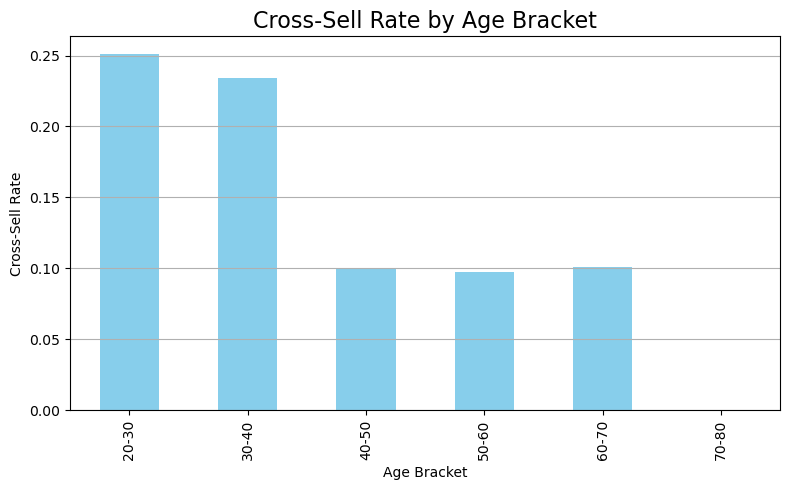

Cross-Sell Rate by Age Bracket:
age_bracket
20-30    0.250960
30-40    0.234140
40-50    0.099587
50-60    0.097755
60-70    0.100716
70-80    0.000000
Name: cross_sell_flag, dtype: float64


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Create age brackets
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
data['age_bracket'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Calculate cross-sell rate per age bracket
age_cross_sell_rate = data.groupby('age_bracket')['cross_sell_flag'].mean() 

# Plot cross-sell rate by age bracket
plt.figure(figsize=(8, 5))
age_cross_sell_rate.plot(kind='bar', color='skyblue')
plt.title("Cross-Sell Rate by Age Bracket", fontsize=16)
plt.xlabel("Age Bracket")
plt.ylabel("Cross-Sell Rate")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display the calculated rates
print("Cross-Sell Rate by Age Bracket:")
print(age_cross_sell_rate)



In [29]:
data['cross_sell_flag'].value_counts()

0    191261
1     41893
Name: cross_sell_flag, dtype: int64

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='age_bracket'>

Text(0.5, 1.0, 'insurance_flag Rate by Age Bracket')

Text(0.5, 0, 'Age Bracket')

Text(0, 0.5, 'insurance_flag Rate')

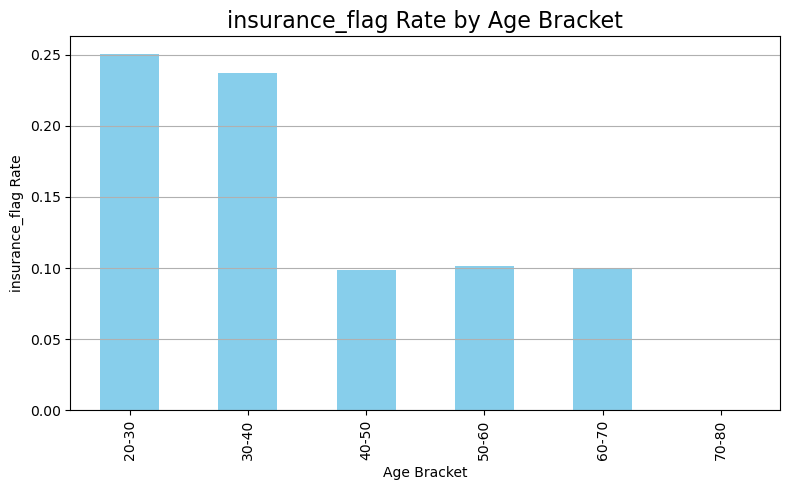

insurance_flag Rate by Age Bracket:
age_bracket
20-30    0.250405
30-40    0.237012
40-50    0.098449
50-60    0.101151
60-70    0.099949
70-80    0.000000
Name: insurance_flag, dtype: float64


0    190991
1     42163
Name: insurance_flag, dtype: int64

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Create age brackets
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
data['age_bracket'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Calculate cross-sell rate per age bracket
age_cross_sell_rate = data.groupby('age_bracket')['insurance_flag'].mean()  #personal_loan_flag  asset_mgmt_flag

# Plot cross-sell rate by age bracket
plt.figure(figsize=(8, 5))
age_cross_sell_rate.plot(kind='bar', color='skyblue')
plt.title("insurance_flag Rate by Age Bracket", fontsize=16)
plt.xlabel("Age Bracket")
plt.ylabel("insurance_flag Rate")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display the calculated rates
print("insurance_flag Rate by Age Bracket:")
print(age_cross_sell_rate)

data['insurance_flag'].value_counts()


<Figure size 800x500 with 0 Axes>

<Axes: xlabel='age_bracket'>

Text(0.5, 1.0, 'personal_loan Rate by Age Bracket')

Text(0.5, 0, 'Age Bracket')

Text(0, 0.5, 'personal_loan Rate')

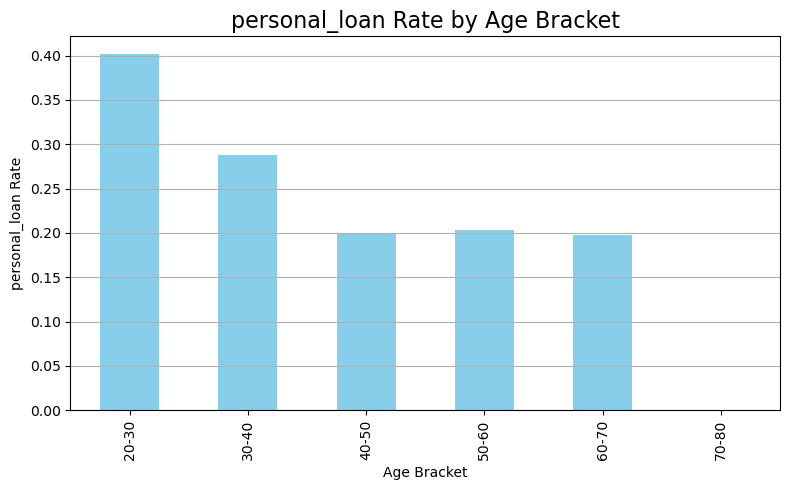

personal_loan Rate by Age Bracket:
age_bracket
20-30    0.401545
30-40    0.287438
40-50    0.198622
50-60    0.203748
60-70    0.197469
70-80    0.000000
Name: personal_loan_flag, dtype: float64


0    169878
1     63276
Name: personal_loan_flag, dtype: int64

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Create age brackets
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
data['age_bracket'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Calculate cross-sell rate per age bracket
age_cross_sell_rate = data.groupby('age_bracket')['personal_loan_flag'].mean()  #personal_loan_flag  asset_mgmt_flag

# Plot cross-sell rate by age bracket
plt.figure(figsize=(8, 5))
age_cross_sell_rate.plot(kind='bar', color='skyblue')
plt.title("personal_loan Rate by Age Bracket", fontsize=16)
plt.xlabel("Age Bracket")
plt.ylabel("personal_loan Rate")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display the calculated rates
print("personal_loan Rate by Age Bracket:")
print(age_cross_sell_rate)

data['personal_loan_flag'].value_counts()


<Figure size 800x500 with 0 Axes>

<Axes: xlabel='age_bracket'>

Text(0.5, 1.0, 'asset_mgmt_flag Rate by Age Bracket')

Text(0.5, 0, 'Age Bracket')

Text(0, 0.5, 'asset_mgmt_flag Rate')

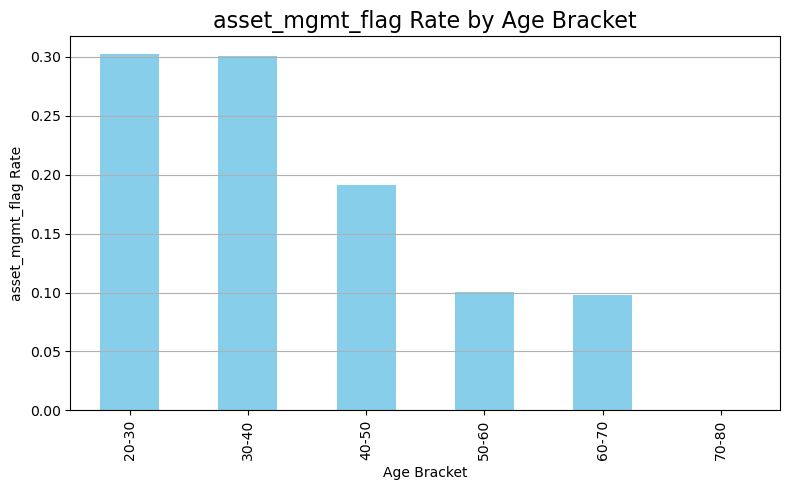

asset_mgmt_flag Rate by Age Bracket:
age_bracket
20-30    0.302280
30-40    0.300795
40-50    0.190876
50-60    0.100145
60-70    0.098287
70-80    0.000000
Name: asset_mgmt_flag, dtype: float64


0    177495
1     55659
Name: asset_mgmt_flag, dtype: int64

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Create age brackets
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
data['age_bracket'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Calculate cross-sell rate per age bracket
age_cross_sell_rate = data.groupby('age_bracket')['asset_mgmt_flag'].mean()  #personal_loan_flag  asset_mgmt_flag

# Plot cross-sell rate by age bracket
plt.figure(figsize=(8, 5))
age_cross_sell_rate.plot(kind='bar', color='skyblue')
plt.title("asset_mgmt_flag Rate by Age Bracket", fontsize=16)
plt.xlabel("Age Bracket")
plt.ylabel("asset_mgmt_flag Rate")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display the calculated rates
print("asset_mgmt_flag Rate by Age Bracket:")
print(age_cross_sell_rate)

data['asset_mgmt_flag'].value_counts()


In [ ]:
STOP

In [33]:
# data.to_csv('model/Final_Synthetic_data.csv',index=False)
# data.to_pickle('model/Final_Synthetic_data.pkl')

### EDA Insights

#### Cross-Sell Rate by Age Bracket and Employment Type

In [35]:

# Create a pivot table
pivot_table = data.pivot_table(
    values='cross_sell_flag', 
    index='age_bracket', 
    columns='Employment_Type', 
    aggfunc='mean'
)

# Multiply by 100 to express as percentages
pivot_table = pivot_table * 100

# Display the pivot table
print("Pivot Table: Cross-Sell Rate by Age Bracket and Employment Type (%)")
print(pivot_table)



Pivot Table: Cross-Sell Rate by Age Bracket and Employment Type (%)
Employment_Type   Salaried  Self employed
age_bracket                              
20-30            24.686235      25.433234
30-40            23.505966      23.340679
40-50            10.048891       9.902628
50-60             9.844811       9.731371
60-70             9.574468      10.366599
70-80                  NaN       0.000000


In [37]:
data['disbursed_amount'].min(), data['disbursed_amount'].max()

(13320, 990572)

#### Cross-Sell Rate by Loan Bracket and Insurance Usage

In [41]:
# Create bins for loan amounts
loan_bins = [0, 50000, 100000, 200000, 500000, 800000 ,data['disbursed_amount'].max()]
loan_labels = ['0-50K', '50K-100K', '1L-2L', '2L-5L','5L-8L' ,'>8L']
data['loan_bracket'] = pd.cut(data['disbursed_amount'], bins=loan_bins, labels=loan_labels, include_lowest=True)


pivot_table_loan_insurance = data.pivot_table(
    values='cross_sell_flag', 
    index='loan_bracket', 
    columns='insurance_flag', 
    aggfunc='mean'
)

pivot_table_loan_insurance = pivot_table_loan_insurance * 100

# Display the pivot table
print("Pivot Table: Cross-Sell Rate by Loan Bracket and Insurance Usage (%)")
print(pivot_table_loan_insurance)


Pivot Table: Cross-Sell Rate by Loan Bracket and Insurance Usage (%)
insurance_flag          0           1
loan_bracket                         
0-50K           17.151943   20.767370
50K-100K        17.370820   21.049192
1L-2L           20.796460   23.333333
2L-5L           33.333333    0.000000
5L-8L                 NaN    0.000000
>8L              0.000000  100.000000


#### Email engagement afffect check


In [42]:
data['email_click_rate'].min(), data['email_click_rate'].max()

(0.0, 1.0)

In [43]:
# Create bins for email click rates
email_bins = [0, .10, .20, .50, 0.7,1.0]
email_labels = ['0-10%', '10-20%', '20-50%', '50-70%','>70%']
data['email_click_rate_bracket'] = pd.cut(data['email_click_rate'], bins=email_bins, labels=email_labels, include_lowest=True)

# Create a pivot table for email click rate brackets
pivot_table_email_engagement = data.pivot_table(
    values='cross_sell_flag',
    index='email_click_rate_bracket',
    aggfunc='mean'
)

pivot_table_email_engagement = pivot_table_email_engagement * 100

# Display the pivot table
print("Pivot Table: Cross-Sell Rate by Email Engagement (%)")
print(pivot_table_email_engagement)



Pivot Table: Cross-Sell Rate by Email Engagement (%)
                          cross_sell_flag
email_click_rate_bracket                 
0-10%                           18.063856
10-20%                          17.805348
20-50%                          17.907100
50-70%                          17.676963
>70%                            18.248473


#### if customers using specific products (e.g., insurance_flag, personal_loan_flag, asset_mgmt_flag) are more likely to cross-sell.

In [45]:
# Create a pivot table for product usage flags
product_usage_pivot = data[['insurance_flag', 'personal_loan_flag', 'asset_mgmt_flag', 'cross_sell_flag']].groupby(
    ['insurance_flag', 'personal_loan_flag', 'asset_mgmt_flag']
).mean()

# Multiply cross-sell rates by 100 for easier interpretation
product_usage_pivot['cross_sell_flag'] = product_usage_pivot['cross_sell_flag'] * 100

# Display the pivot table
print("Cross-Sell Rate by Product Usage Combinations:")
print(product_usage_pivot)


Cross-Sell Rate by Product Usage Combinations:
                                                   cross_sell_flag
insurance_flag personal_loan_flag asset_mgmt_flag                 
0              0                  0                      15.917577
                                  1                      19.161733
               1                  0                      18.329399
                                  1                      21.487342
1              0                  0                      19.683031
                                  1                      22.145733
               1                  0                      22.321628
                                  1                      22.867565


In [46]:
data['income_to_loan_ratio'].min(), data['income_to_loan_ratio'].max()

(0.09463761939381785, 0.93797350582606)

In [51]:
# Create bins for loan to asset value ratio
income_bins = [0, .2, .5, .80, data['income_to_loan_ratio'].max()]
income_labels = ['Low (<20%)', 'Moderate (20-50%)', 'High (50-80%)', 'Very High (>80%)']
data['Asset_value_to_loan_bracket'] = pd.cut(data['income_to_loan_ratio'], bins=income_bins, labels=income_labels, include_lowest=True)

# Create a pivot table
income_to_loan_pivot = data.pivot_table(
    values='cross_sell_flag', 
    index='Asset_value_to_loan_bracket', 
    aggfunc='mean'
)

# Multiply by 100 to express as percentages
income_to_loan_pivot = income_to_loan_pivot * 100

# Display the pivot table
print("Cross-Sell Rate by Asset-value-to-Loan Ratio:")
print(income_to_loan_pivot)


Cross-Sell Rate by Asset-value-to-Loan Ratio:
                             cross_sell_flag
Asset_value_to_loan_bracket                 
Low (<20%)                         14.000000
Moderate (20-50%)                  19.242166
High (50-80%)                      18.326857
Very High (>80%)                   16.908256


In [52]:
data.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment_Type',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'loan_default', 'age', 'customer_tenure_months', 'risk_level',
       'AVERAGE_ACCT_AGE_MONTHS', 'CREDIT_HISTORY_LENGTH_MONTHS',
       'call_logs_count', 'sms_count', 'email_click_rate', 'last_call_date',
       'last_email_click_date', 'insurance_flag', 'personal_loan_flag',
       'asset_mgmt_flag', 'total_products', 'income_to_loan_ratio',
       'paym

#### Does Risk profile affect cross sell?

In [53]:
data['customer_tenure_months'].min(), data['customer_tenure_months'].max()

(73, 75)

In [55]:
# Create a pivot table
risk_level_pivot = data.pivot_table(
    values='cross_sell_flag', 
    index='risk_level', 
    aggfunc='mean'
)

# Multiply by 100 to express as percentages
risk_level_pivot = risk_level_pivot * 100

# Display the pivot table
print("Cross-Sell Rate by Risk Level:")
print(risk_level_pivot)


Cross-Sell Rate by Risk Level:
            cross_sell_flag
risk_level                 
0                 19.218708
1                 16.681638
2                 16.806316
3                 15.750520
4                 14.692230


#### CNS Score relation to cross sell

In [56]:
data['PERFORM_CNS_SCORE'].min(),data['PERFORM_CNS_SCORE'].max(),data['PERFORM_CNS_SCORE'].mean()
data['PERFORM_CNS_SCORE'].median()


(0, 890, 289.46299441570807)

0.0

Cross-Sell Rate by PERFORM_CNS_SCORE Bins:
                cross_sell_flag
CNS_SCORE_BINS                 
(-0.001, 89.0]        19.218708
(267.0, 356.0]        14.717019
(356.0, 445.0]        15.905947
(445.0, 534.0]        14.899269
(534.0, 623.0]        16.878362
(623.0, 712.0]        16.513691
(712.0, 801.0]        16.724352
(801.0, 890.0]        16.836592


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='CNS_SCORE_BINS'>

Text(0.5, 1.0, 'Cross-Sell Rate by CNS_SCORE Bins')

Text(0.5, 0, 'CNS Score Bins')

Text(0, 0.5, 'Cross-Sell Rate (%)')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(-0.001, 89.0]'),
  Text(1, 0, '(267.0, 356.0]'),
  Text(2, 0, '(356.0, 445.0]'),
  Text(3, 0, '(445.0, 534.0]'),
  Text(4, 0, '(534.0, 623.0]'),
  Text(5, 0, '(623.0, 712.0]'),
  Text(6, 0, '(712.0, 801.0]'),
  Text(7, 0, '(801.0, 890.0]')])

<Figure size 1000x600 with 0 Axes>

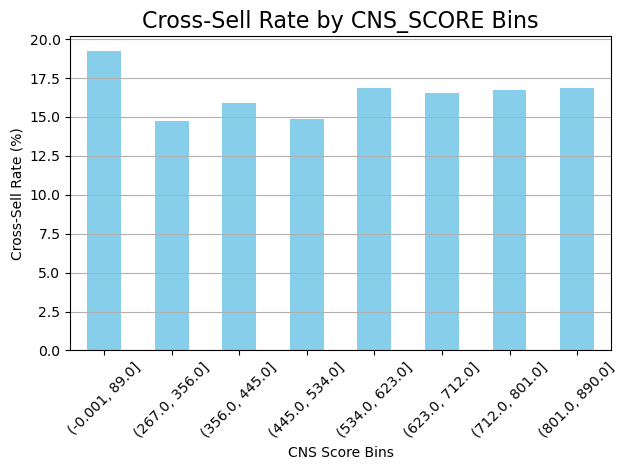

In [58]:
import numpy as np

# Step 1: Define the number of bins 
num_bins = 10
bin_edges = np.linspace(data['PERFORM_CNS_SCORE'].min(), data['PERFORM_CNS_SCORE'].max(), num_bins + 1)

# Step 2: Create bins for 'PERFORM_CNS_SCORE'
data['CNS_SCORE_BINS'] = pd.cut(data['PERFORM_CNS_SCORE'], bins=bin_edges, include_lowest=True)

# Step 3: Calculate cross-sell rate for each bin
cns_score_pivot = data.pivot_table(
    values='cross_sell_flag', 
    index='CNS_SCORE_BINS', 
    aggfunc='mean'
)

# Convert to percentage
cns_score_pivot = cns_score_pivot * 100

# Display the pivot table
print("Cross-Sell Rate by PERFORM_CNS_SCORE Bins:")
print(cns_score_pivot)

# Plot the cross-sell rate by CNS score bins
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
cns_score_pivot.plot(kind='bar', color='skyblue', legend=False)
plt.title("Cross-Sell Rate by CNS_SCORE Bins", fontsize=16)
plt.xlabel("CNS Score Bins")
plt.ylabel("Cross-Sell Rate (%)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [59]:
dfbkp=data.copy()

### Encoding

In [60]:
df=data.copy()

In [61]:
#Encode categorical variables
df = pd.get_dummies(df, columns=['Employment_Type'], drop_first=True)

# Interaction feature: Total products and customer interaction
df['interaction_intensity'] = df['call_logs_count'] + df['sms_count'] + df['email_click_rate'] * 100

### EDA - data Transformation

<Axes: >

<Axes: xlabel='disbursed_amount', ylabel='Density'>

Text(0.5, 1.0, 'Disbursed Amount')

<Axes: >

<Axes: xlabel='asset_cost', ylabel='Density'>

Text(0.5, 1.0, 'Asset Cost')

<Axes: >

<Axes: xlabel='ltv', ylabel='Density'>

Text(0.5, 1.0, 'Loan to value of the asset')

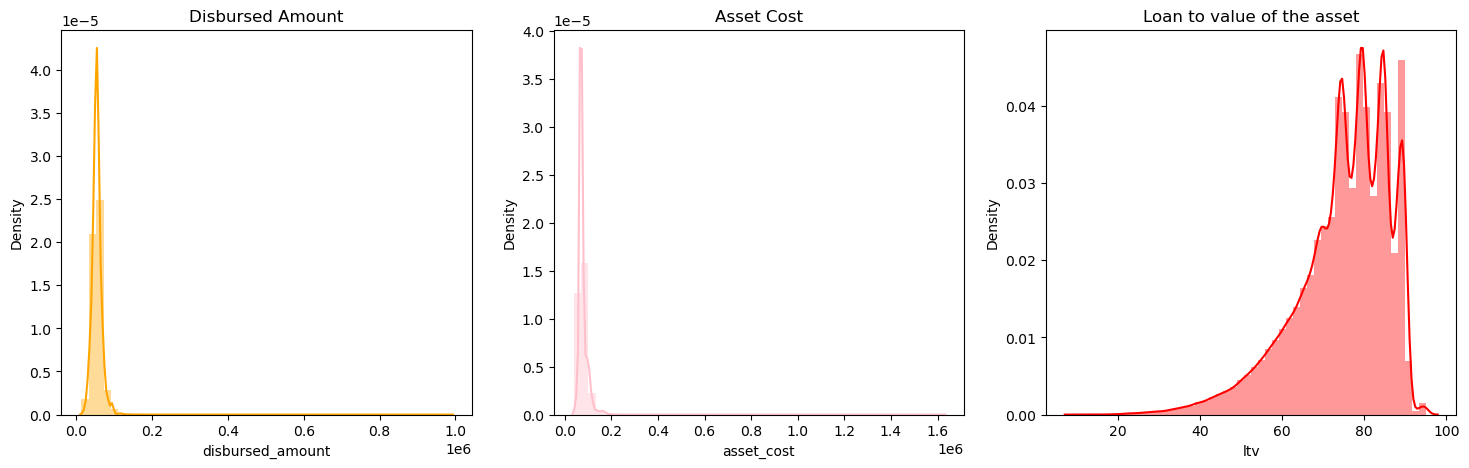

In [62]:
# check the distribution of disbursed amount

plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(df['disbursed_amount'],  color = 'orange')
plt.title('Disbursed Amount')

plt.subplot(1, 3, 2)
sns.distplot(df['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(df['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

In [63]:
print("Skewness of LTV column before transformation:", df['ltv'].skew())

Skewness of LTV column before transformation: -1.0757660644024252


<Axes: >

<Axes: xlabel='disbursed_amount', ylabel='Density'>

Text(0.5, 1.0, 'Disbursed Amount')

<Axes: >

<Axes: xlabel='asset_cost', ylabel='Density'>

Text(0.5, 1.0, 'Asset Cost')

<Axes: >

<Axes: xlabel='ltv', ylabel='Density'>

Text(0.5, 1.0, 'Loan to value of the asset')

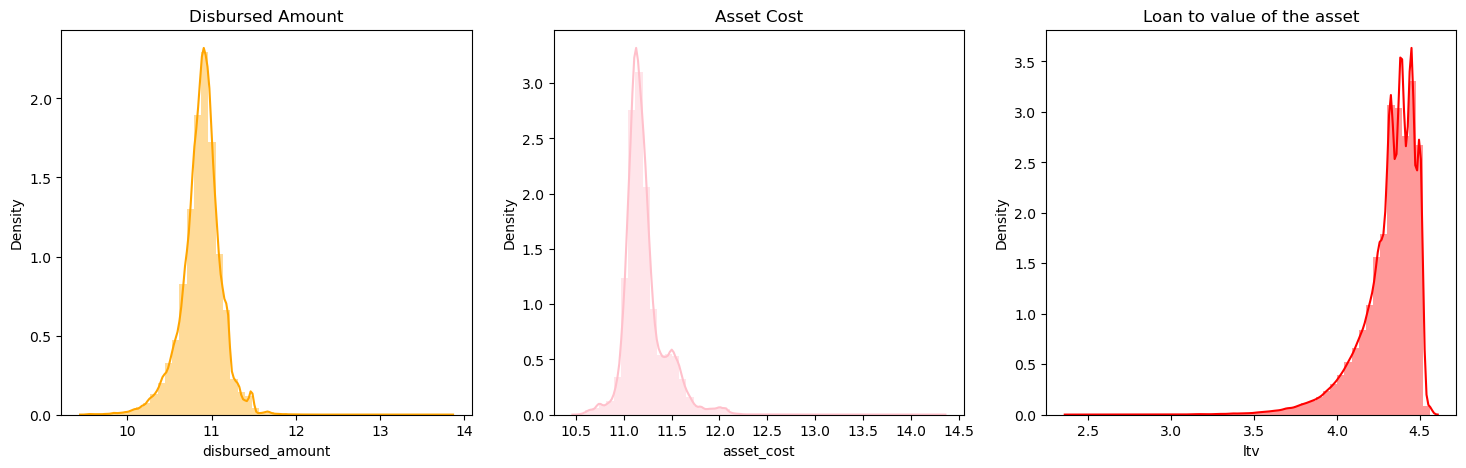

In [64]:
#performing log transformations on disbursed amount, ltv, and asset cost

df['disbursed_amount'] = np.log1p(df['disbursed_amount'])
df['ltv'] = np.log1p(df['ltv'])
df['asset_cost'] = np.log1p(df['asset_cost'])


plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(df['disbursed_amount'],  color = 'orange')
plt.title('Disbursed Amount')

plt.subplot(1, 3, 2)
sns.distplot(df['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(df['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

### EDA- Fature Distribution checks

Unique values in 'risk_level': [0 2 4 1 3]
Value counts of 'risk_level':
 0    129785
1     69022
2     12412
3     12025
4      9910
Name: risk_level, dtype: int64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='risk_level', ylabel='count'>

Text(0.5, 1.0, 'Count Distribution of Risk Level (Numerical)')

Text(0.5, 0, 'Risk Level')

Text(0, 0.5, 'Count')

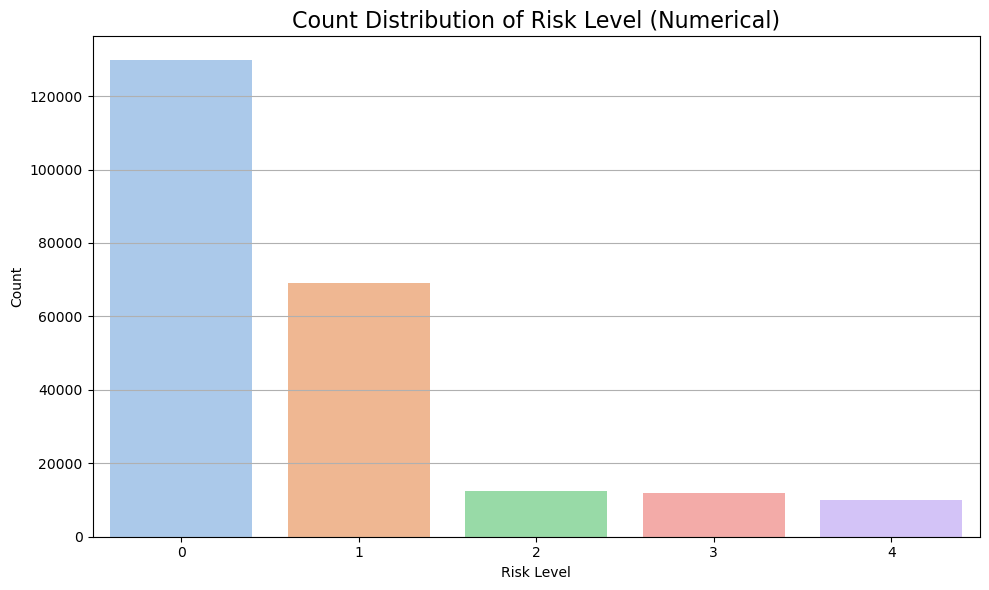

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check unique values and counts for reference
print("Unique values in 'risk_level':", df['risk_level'].unique())
print("Value counts of 'risk_level':\n", df['risk_level'].value_counts())

# Plot the count distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='risk_level', data=df, palette='pastel')
plt.title("Count Distribution of Risk Level (Numerical)", fontsize=16)
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 53 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   disbursed_amount                     233154 non-null  float64 
 1   asset_cost                           233154 non-null  float64 
 2   ltv                                  233154 non-null  float64 
 3   MobileNo_Avl_Flag                    233154 non-null  int64   
 4   Aadhar_flag                          233154 non-null  int64   
 5   PAN_flag                             233154 non-null  int64   
 6   VoterID_flag                         233154 non-null  int64   
 7   Driving_flag                         233154 non-null  int64   
 8   Passport_flag                        233154 non-null  int64   
 9   PERFORM_CNS_SCORE                    233154 non-null  int64   
 10  PRI_NO_OF_ACCTS                      233154 non-null  int64   
 11  

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='cross_sell_flag', ylabel='count'>

Text(0.5, 1.0, 'Distribution of cross_sell_flag')

Text(0.5, 0, 'Cross-Sell Flag')

Text(0, 0.5, 'Count')

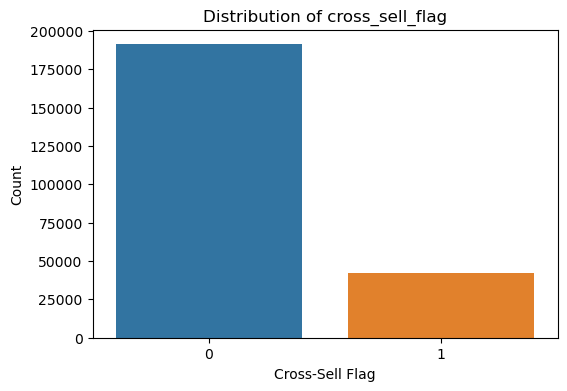

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Check the target variable distribution
target_variable = 'cross_sell_flag'
plt.figure(figsize=(6, 4))
sns.countplot(x=target_variable, data=df)
plt.title(f"Distribution of {target_variable}")
plt.xlabel("Cross-Sell Flag")
plt.ylabel("Count")
plt.show()

In [69]:
target_variable

'cross_sell_flag'

In [71]:
# # Step 2: Check numerical feature distributions
# numerical_columns = ['income_to_loan_ratio','MobileNo_Avl_Flag','Aadhar_flag','PAN_flag','Driving_flag','NO_OF_INQUIRIES']
# for col in numerical_columns:
#     if col != target_variable:
#         plt.figure(figsize=(8, 4))
#         sns.histplot(df[col], kde=True, bins=30)
#         plt.title(f"Distribution of {col}")
#         plt.xlabel(col)
#         plt.ylabel("Frequency")
#         plt.show()

<Axes: xlabel='income_to_loan_ratio', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of income_to_loan_ratio')

Text(0.5, 0, 'income_to_loan_ratio')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='MobileNo_Avl_Flag', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MobileNo_Avl_Flag')

Text(0.5, 0, 'MobileNo_Avl_Flag')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Aadhar_flag', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Aadhar_flag')

Text(0.5, 0, 'Aadhar_flag')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PAN_flag', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of PAN_flag')

Text(0.5, 0, 'PAN_flag')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Driving_flag', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Driving_flag')

Text(0.5, 0, 'Driving_flag')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='NO_OF_INQUIRIES', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of NO_OF_INQUIRIES')

Text(0.5, 0, 'NO_OF_INQUIRIES')

Text(0, 0.5, 'Frequency')

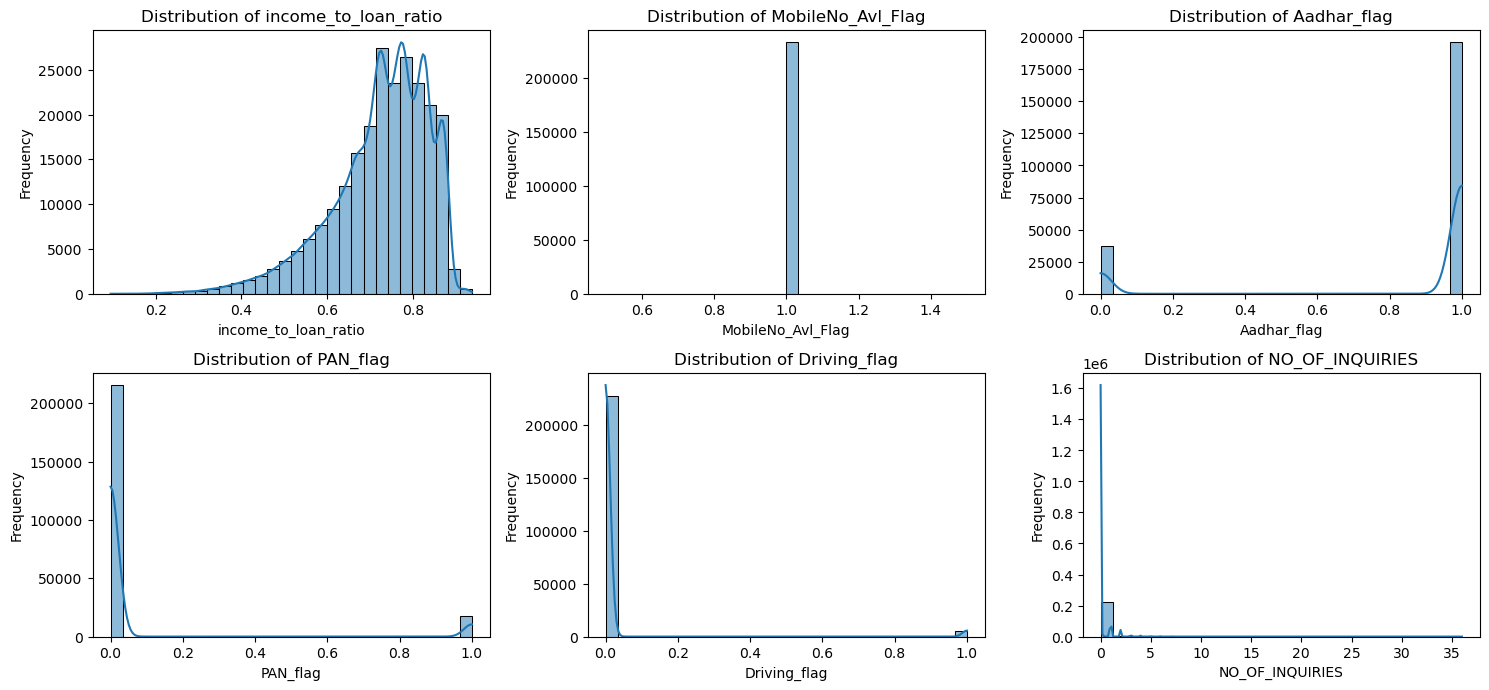

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to visualize
numerical_columns = ['income_to_loan_ratio', 'MobileNo_Avl_Flag', 'Aadhar_flag', 
                     'PAN_flag', 'Driving_flag', 'NO_OF_INQUIRIES']

# Create a grid layout for better display
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array for easy iteration

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove any empty subplots (if columns are fewer than grid cells)
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Correlation Matrix

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

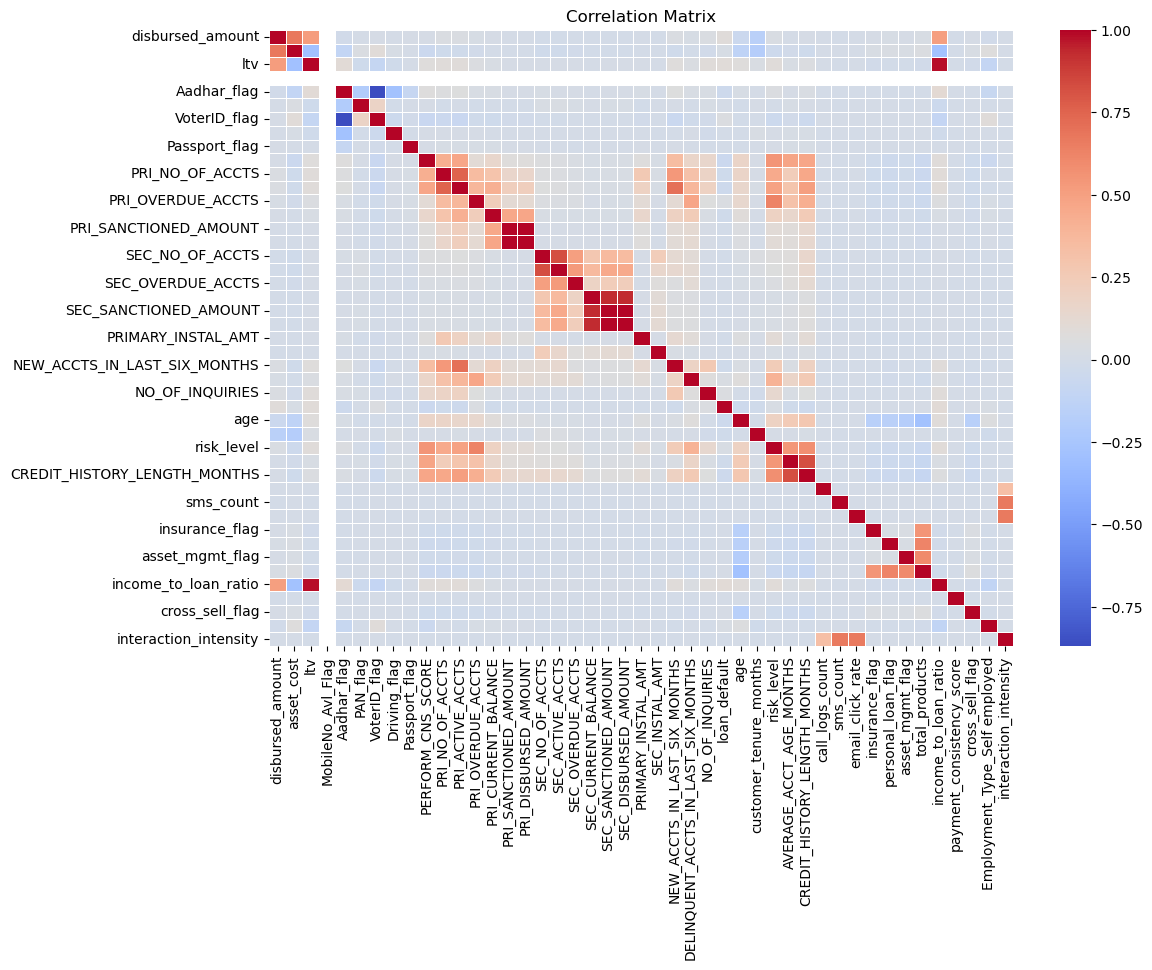

In [73]:
# Check correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [74]:
from scipy.stats import pearsonr, spearmanr

pearson_corr, _ = pearsonr(df['income_to_loan_ratio'], df['ltv'])
spearman_corr, _ = spearmanr(df['income_to_loan_ratio'], df['ltv'])

print(f"Pearson Correlation: {pearson_corr:.2f}")
print(f"Spearman Correlation: {spearman_corr:.2f}")

Pearson Correlation: 0.98
Spearman Correlation: 0.99


The above 2 columns seems to be highly correlated , hence we will only use ltv going forward

In [75]:
pearson_corr, _ = pearsonr(df['asset_cost'], df['ltv'])
print(f"Pearson Correlation: {pearson_corr:.2f}")

Pearson Correlation: -0.29


In [76]:
#Drop unused features
df = df.drop(columns=['income_to_loan_ratio'])
df.shape

(233154, 52)

In [78]:
pearson_corr, _ = pearsonr(df['risk_level'], df['cross_sell_flag'])
print(f"Pearson Correlation: {pearson_corr:.2f}")

Pearson Correlation: -0.03


In [77]:
# Step 1: Compute correlations for numerical features
correlations = df.corr()[['cross_sell_flag']].sort_values(by='cross_sell_flag', ascending=False)
top_numerical_features = correlations.index[:15].tolist()  # Top correlated features
print("Top Numerical Features by Correlation with cross_sell_flag:")
print(correlations.head(15))

Top Numerical Features by Correlation with cross_sell_flag:
                        cross_sell_flag
cross_sell_flag                1.000000
total_products                 0.055847
insurance_flag                 0.036636
asset_mgmt_flag                0.034597
personal_loan_flag             0.028806
asset_cost                     0.024890
disbursed_amount               0.008958
loan_default                   0.007459
VoterID_flag                   0.003900
email_click_rate               0.001853
customer_tenure_months         0.001492
PAN_flag                       0.000840
Driving_flag                   0.000839
interaction_intensity          0.000592
SEC_CURRENT_BALANCE            0.000062


In [79]:
print(correlations.head(10))

                    cross_sell_flag
cross_sell_flag            1.000000
total_products             0.055847
insurance_flag             0.036636
asset_mgmt_flag            0.034597
personal_loan_flag         0.028806
asset_cost                 0.024890
disbursed_amount           0.008958
loan_default               0.007459
VoterID_flag               0.003900
email_click_rate           0.001853


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Selected Features')

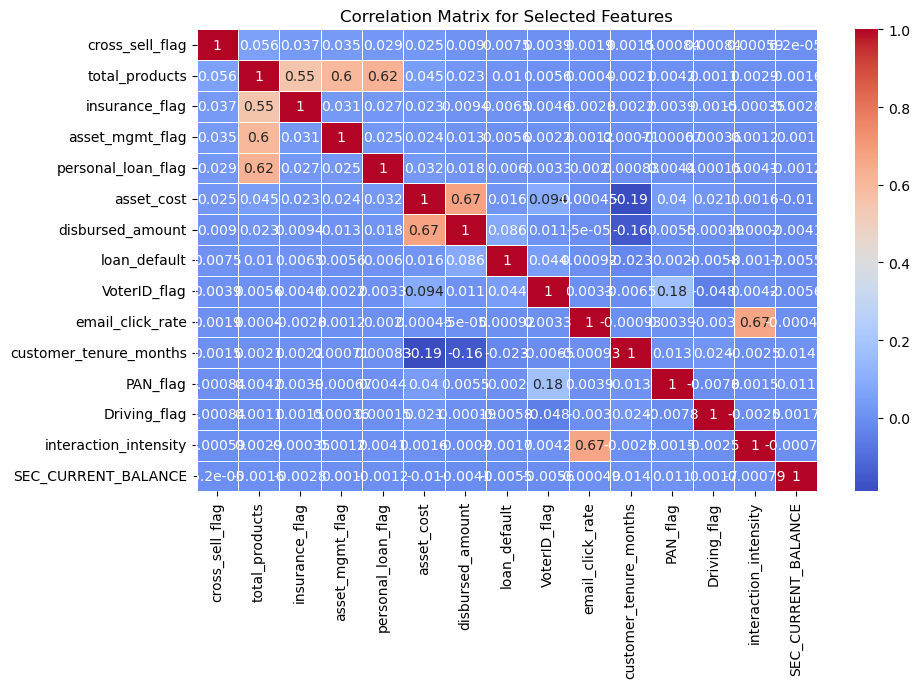

In [80]:
# Display the correlation matrix for selected numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Selected Features")
plt.show()

In [81]:
display(HTML(df.head(2).to_html()))

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default,age,customer_tenure_months,risk_level,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS,call_logs_count,sms_count,email_click_rate,last_call_date,last_email_click_date,insurance_flag,personal_loan_flag,asset_mgmt_flag,total_products,payment_consistency_score,cross_sell_flag,age_bracket,loan_bracket,email_click_rate_bracket,income_to_loan_bracket,Asset_value_to_loan_bracket,CNS_SCORE_BINS,Employment_Type_Self employed,interaction_intensity
0,10.831292,10.975088,4.505902,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,75,0,0,0,48,77,0.86,2023-12-16,2024-11-09,0,0,1,1,1,0,30-40,50K-100K,>70%,Very High (>80%),Very High (>80%),"(-0.001, 89.0]",0,211.0
1,10.761004,11.090584,4.307168,1,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,0,1,39,74,2,23,23,21,28,0.16,2024-06-16,2024-06-05,1,1,0,2,0,1,30-40,0-50K,10-20%,High (50-80%),High (50-80%),"(534.0, 623.0]",1,65.0


In [82]:
df.shape
df.to_csv('model/synthetic_data_EDA_bins_b4_model_feature_drop.csv',index=False)
df.to_pickle('model/synthetic_data_EDA_bins_b4_model_feature_drop.pkl')

(233154, 52)

In [83]:
df.drop_duplicates().shape

(233154, 52)

In [84]:
dfbkp_eda=df.copy()

In [85]:
# df.columns.to_list()  'age_bracket','loan_bracket','email_click_rate_bracket','income_to_loan_bracket'
# Asset_value_to_loan_bracket	CNS_SCORE_BINS
df = df.drop(columns=['last_call_date','last_email_click_date','age_bracket','loan_bracket','email_click_rate_bracket','income_to_loan_bracket'\
                     ,'Asset_value_to_loan_bracket','CNS_SCORE_BINS'])
df.columns
df.shape

Index(['disbursed_amount', 'asset_cost', 'ltv', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'loan_default', 'age', 'customer_tenure_months', 'risk_level',
       'AVERAGE_ACCT_AGE_MONTHS', 'CREDIT_HISTORY_LENGTH_MONTHS',
       'call_logs_count', 'sms_count', 'email_click_rate', 'insurance_flag',
       'personal_loan_flag', 'asset_mgmt_flag', 'total_products',
       'payment_consistency_score', 'cross_sell_flag',
       'Employment_Type_Self employed', 'interacti

(233154, 44)

In [87]:
df.dtypes

disbursed_amount                       float64
asset_cost                             float64
ltv                                    float64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS_SCORE                        int64
PRI_NO_OF_ACCTS                          int64
PRI_ACTIVE_ACCTS                         int64
PRI_OVERDUE_ACCTS                        int64
PRI_CURRENT_BALANCE                      int64
PRI_SANCTIONED_AMOUNT                    int64
PRI_DISBURSED_AMOUNT                     int64
SEC_NO_OF_ACCTS                          int64
SEC_ACTIVE_ACCTS                         int64
SEC_OVERDUE_ACCTS                        int64
SEC_CURRENT_BALANCE                      int64
SEC_SANCTIONED_AMOUNT                    int64
SEC_DISBURSED

#### Pairs of Correlated features

In [88]:
# Step 1: Compute Correlation Matrix
correlation_matrix = df.corr()

# Step 2: Identify Highly Correlated Features (Threshold > 0.8)
correlation_threshold = 0.8
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlated_features.add((feature1, feature2))

# Display the pairs of highly correlated features
print("Highly Correlated Feature Pairs (Correlation > 0.8):")
for feature1, feature2 in correlated_features:
    print(f"{feature1} - {feature2}")


Highly Correlated Feature Pairs (Correlation > 0.8):
SEC_SANCTIONED_AMOUNT - SEC_CURRENT_BALANCE
PRI_DISBURSED_AMOUNT - PRI_SANCTIONED_AMOUNT
SEC_ACTIVE_ACCTS - SEC_NO_OF_ACCTS
CREDIT_HISTORY_LENGTH_MONTHS - AVERAGE_ACCT_AGE_MONTHS
SEC_DISBURSED_AMOUNT - SEC_SANCTIONED_AMOUNT
SEC_DISBURSED_AMOUNT - SEC_CURRENT_BALANCE
VoterID_flag - Aadhar_flag


In [89]:
# dfbkp=df.copy()
# df.to_csv('model/backup_data_eda_1.csv',index=False)
df.shape

(233154, 44)

In [90]:
# Step : Drop Correlated Features (Retain One from Each Pair)
features_to_drop = {pair[1] for pair in correlated_features}  # Drop the second feature in each pair
df_dedup = df.drop(columns=features_to_drop)

# Step : Display Results
print(f"Original number of features: {df.shape[1]}")
print(f"Number of features after dropping correlated ones: {df_dedup.shape[1]}")
print(f"Dropped features: {features_to_drop}")



Original number of features: 44
Number of features after dropping correlated ones: 38
Dropped features: {'SEC_SANCTIONED_AMOUNT', 'PRI_SANCTIONED_AMOUNT', 'SEC_CURRENT_BALANCE', 'Aadhar_flag', 'SEC_NO_OF_ACCTS', 'AVERAGE_ACCT_AGE_MONTHS'}


In [91]:
import pickle
df_dedup.to_pickle('model/refined_data_after_corr_feature_drop.pkl')
df_dedup.shape

(233154, 38)

### Model Development - V1- SMOTE

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Step 2: Split the Data into Training and Test Sets
target_variable = 'cross_sell_flag'
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((186523, 43), (46631, 43), (186523,), (46631,))

In [105]:
# Step: Apply SMOTE for Logistic Regression
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step: Train Logistic Regression with SMOTE
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

# Step: Train Random Forest with Class Weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Step: Train XGBoost with Scale Pos Weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Step: Evaluate Models
models = {'Logistic Regression': lr_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}
results = []

for model_name, model in models.items():
    if model_name == 'Logistic Regression':
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Balanced Accuracy': balanced_acc,
        'AUC-ROC': auc_roc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)



LogisticRegression(max_iter=1000, random_state=42)

RandomForestClassifier(class_weight='balanced', random_state=42)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [106]:
results_df

,Model,Accuracy,Balanced Accuracy,AUC-ROC
0,Logistic Regression,0.522571,0.526317,0.537351
1,Random Forest,0.820270,0.500067,0.619477
2,XGBoost,0.566190,0.613952,0.621921


In [95]:

# Step 8: Calculate Mean Feature Importance from RF and XGBoost
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
mean_importances = (rf_importances + xgb_importances) / 2
top_features = mean_importances.sort_values(ascending=False).head(10)

# Display Results
print("Model Performance Comparison:")
print(results_df)

print("\nMean Feature Importances (Top 10):")
print(top_features)


Model Performance Comparison:
                 Model  Accuracy  F1 Score  Balanced Accuracy   AUC-ROC
0  Logistic Regression  0.522571  0.286008           0.526317  0.537351
1        Random Forest  0.820270  0.000477           0.500067  0.619477
2              XGBoost  0.566190  0.363207           0.613952  0.621921

Mean Feature Importances (Top 10):
age                             0.164204
asset_cost                      0.053434
ltv                             0.053114
disbursed_amount                0.051617
interaction_intensity           0.049940
sms_count                       0.048502
email_click_rate                0.048171
call_logs_count                 0.046080
PRI_DISBURSED_AMOUNT            0.024139
CREDIT_HISTORY_LENGTH_MONTHS    0.023625
dtype: float64


In [97]:
# Save Results for Reference
results_df.to_csv('model/model_performance_comparison_v1.csv',index=False)
top_features.to_csv('model/top_10_feature_importances.csv', index=False)

In [102]:
output_file = 'model/model_results_and_feature_importance.xlsx'

# Create a dictionary of DataFrames to write to Excel
data_to_save = {
    'Model_Performance': results_df,
    'Feature_Importance': mean_importances.sort_values(ascending=False).reset_index()
}

# Save to Excel
with pd.ExcelWriter(output_file) as writer:
    data_to_save['Model_Performance'].to_excel(writer, sheet_name='Model_Performance', index=False)
    data_to_save['Feature_Importance'].to_excel(writer, sheet_name='Feature_Importance', index=False)

print(f"Results and feature importance have been saved to {output_file}.")


Results and feature importance have been saved to model/model_results_and_feature_importance.xlsx.


In [ ]:
import pickle
model_save_path = 'model/saved_models/'

# Save Logistic Regression Model
with open(model_save_path + 'logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# Save Random Forest Model
with open(model_save_path + 'random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save XGBoost Model
with open(model_save_path + 'xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Save SMOTE Scaler (for Logistic Regression)
with open(model_save_path + 'smote_scaler.pkl', 'wb') as f:
    pickle.dump(smote, f)


